In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime



In [ ]:
#start_date/end_date in format: 'yyyy-mm-dd'
#breakdown = True gives graph broken down by the sources (twitter, reddit, crypto, conventional)


def count_hack_graph(df, start_date, end_date, entity= '', breakdown= False):  
    
    # Process dataframe
    # Get datetime format for df date
    for fmt in ('%Y-%m-%d %H:%M:%S', '%d/%m/%y %H:%M', '%d/%m/%y'):
        try:
            df['date'] = pd.to_datetime(df.date_time, format=fmt)
        except ValueError:
            pass

    df['date'] = df['date'].dt.date
    df['entity'] = df['entity'].str.lower()
    
    #If there is an input in the entity, filter to retrieve only from entity    
    if entity != '':
        entity = entity.lower()
        
        #Get subset of dataframe with entity 
        df = df[df['entity'] == entity]
    
    if breakdown:
        
        #Group data by date and find the number of posts predicted as risky 
        df2 =  df.groupby(['type','date']).sum()
        df2.reset_index(level=0, inplace=True)    


        df3 = pd.DataFrame()
        types = ['conventional', 'crypto', 'reddit', 'twitter']

        #Get all date within range and fill dates with no data with 0 
        for i in types:
            df_tem = df2[df2['type']==i]
            idx = pd.date_range(start_date, end_date)
            df_tem.index =  pd.DatetimeIndex(df_tem.index)
            df_tem = df_tem.reindex(idx, fill_value=0)
            df_tem['type'] = i
            df_tem.reset_index(level=0, inplace=True)
            df3 = df3.append(df_tem)

        df3 = df3.rename({'pred': 'count', 'index':'date'}, axis = 1)

        # Plot graph of % predicted risky over time 
        plt.figure(figsize=(15,10))
        sns.lineplot(x = df3['date'],y = df3['count'],sort=False,hue = df3['type'], palette = ['black','palevioletred','orangered','steelblue'])

        plt.xlim()
        plt.xlabel('Date')
        plt.ylabel('Num Predicted as high risk')
        plt.title('Num Predicted as high risk over Time (' + entity + ')')
        plt.show()   
        
        
    else:

        #Group data by date and find the number of posts predicted as risky 
        df2 =  df.groupby('date').sum()

        #Get all date within range and fill dates with no data with 0 
        idx = pd.date_range(start_date, end_date)
        df2.index =  pd.DatetimeIndex(df2.index)
        df2 = df2.reindex(idx, fill_value=0)

        df2 = df2.rename({'pred': 'count'}, axis = 1)

        #Print dates & percentage hack that values are exceptionally high (>95 percentile)
        high = df2['count'].quantile(0.95)
        print(df2[df2['count'] > high][['count']])


        # Plot graph of % predicted risky over time 
        plt.figure(figsize=(15,10))
        plt.plot(df2.index, df2['count'])
        plt.hlines(high,start_date, end_date, linestyles = 'dashed', colors = 'gray')

        plt.grid(True)
        plt.xlim()
        plt.xlabel('Date')
        plt.ylabel('Num Predicted as high risk')
        plt.title('Num Predicted as high risk over Time (' + entity + ')')
        plt.show()


# BERT Cased test data

In [5]:
# Test data
df1 = pd.read_csv('./data/bert/2020_bert_reddit.csv')
df1 = df1[['date_time', 'text', 'pred', 'entity']]
df1['type'] = 'reddit'

df2 = pd.read_csv('./data/bert/2020_bert_conventional.csv')
df2 = df2[['date_time', 'text', 'pred', 'entity']]
df2['type'] = 'conventional'

df3 = pd.read_csv('./data/bert/2020_bert_crypto.csv')
df3 = df3[['date_time', 'text', 'pred', 'entity']]
df3['type'] = 'crypto'

df4 = pd.read_csv('./data/bert/2020_bert_twitter.csv')
df4 = df4[['date_time', 'text', 'pred', 'entity']]
df4['type'] = 'twitter'

bert_cased = df1.append(df2)
bert_cased = bert_cased.append(df3)
bert_cased = bert_cased.append(df4)

# Process dataframe
# Get datetime format for df date
for fmt in ('%Y-%m-%d %H:%M:%S', '%d/%m/%y %H:%M', '%d/%m/%y'):
    try:
        bert_cased['date'] = pd.to_datetime(bert_cased.date_time, format=fmt)
    except ValueError:
        pass
    
bert_cased['date'] = bert_cased['date'].dt.date
bert_cased['entity'] = bert_cased['entity'].str.lower()



In [6]:
bert_cased.head()

,date_time,text,pred,entity,type,date
0,2020-06-29 11:16:37,balancer just got hacked it seems https://medi...,1,1inch.exchange,reddit,2020-06-29
1,2020-06-29 10:58:19,another article.\n\nhttps://medium.com/@1inch....,0,1inch.exchange,reddit,2020-06-29
2,2020-06-18 18:39:28,revoke your permissions and contracts? honestl...,0,1inch.exchange,reddit,2020-06-18
3,2020-02-25 03:27:22,"no uniswap, no synthetix, 3 lending services -...",0,1inch.exchange,reddit,2020-02-25
4,2020-02-21 08:19:25,https://medium.com/@1inch.exchange/yes-we-hack...,0,1inch.exchange,reddit,2020-02-21


/Users/JX/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


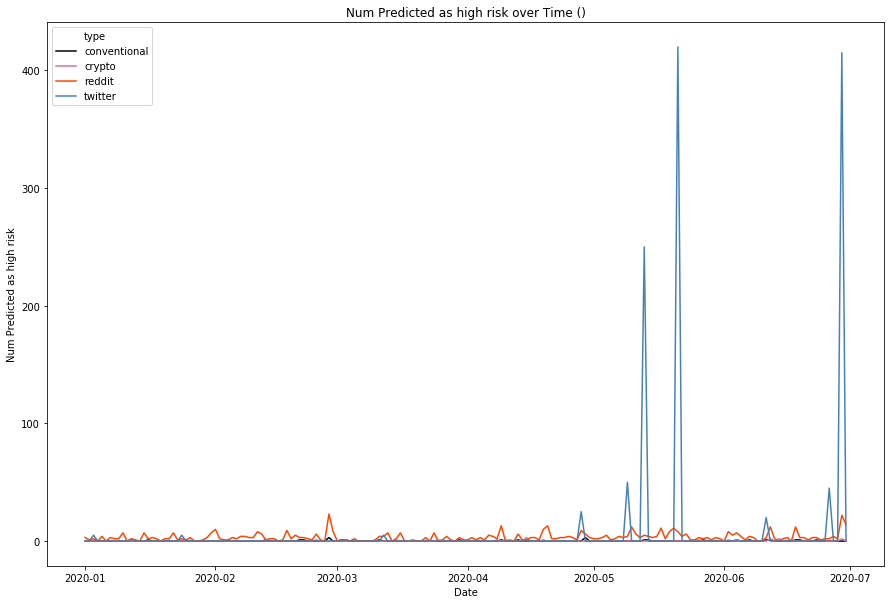

In [7]:
count_hack_graph(bert_cased, '2020-01-01', '2020-06-30', breakdown = True)
